Iteration: 50 / 500
82.532%
Iteration: 100 / 500
87.825%
Iteration: 150 / 500
89.453%
Iteration: 200 / 500
90.462%
Iteration: 250 / 500
90.788%
Iteration: 300 / 500
91.150%
Iteration: 350 / 500
91.488%
Iteration: 400 / 500
91.643%
Iteration: 450 / 500
91.795%
Iteration: 500 / 500
92.000%
Prediction:  [7]
Label:  7


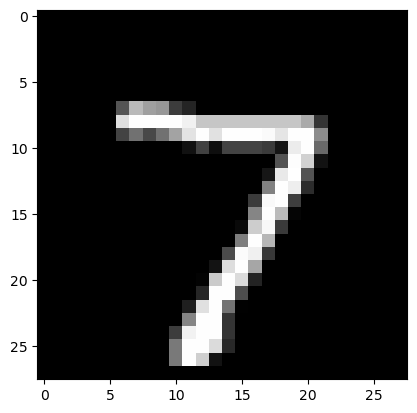

Prediction:  [0]
Label:  0


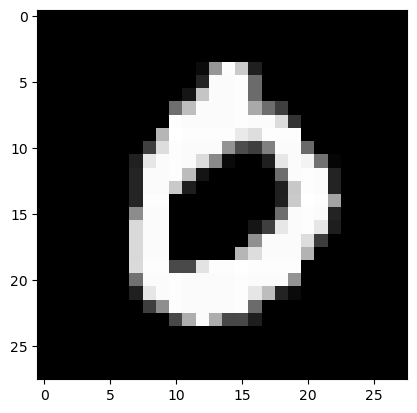

Prediction:  [1]
Label:  1


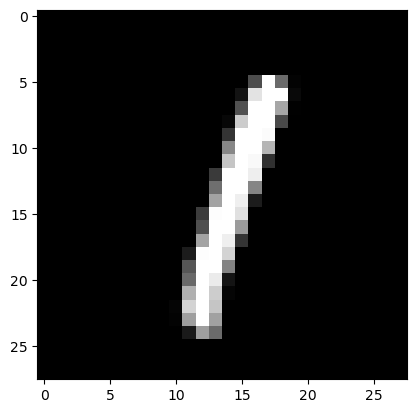

Prediction:  [5]
Label:  5


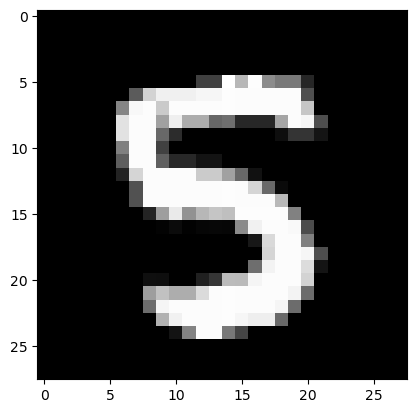

Prediction:  [4]
Label:  4


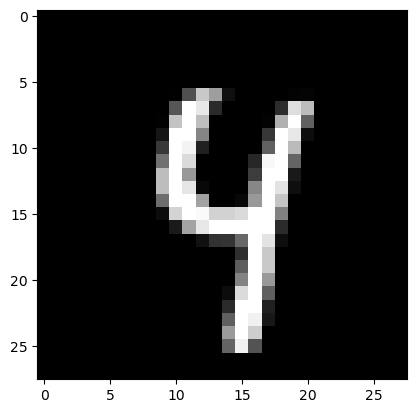

In [1]:
import pandas as pd
import numpy as np
import pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt

def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)

def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2


def forward_propagation(X,W1,b1,W2,b2):
    Z1 = W1.dot(X) + b1 #10, m
    A1 = ReLU(Z1) # 10,m
    Z2 = W2.dot(A1) + b2 #10,m
    A2 = softmax(Z2) #10,m
    return Z1, A1, Z2, A2

def one_hot(Y):
    ''' return an 0 vector with 1 only in the position correspondind to the value in Y'''
    one_hot_Y = np.zeros((Y.max()+1,Y.size)) 
    one_hot_Y[Y,np.arange(Y.size)] = 1 # puts a 1 in row Y[i] and in column i, changes the order but not the number
    return one_hot_Y

def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y) #10,m
    dW2 = 1/m * (dZ2.dot(A1.T)) # 10 , 10
    db2 = 1/m * np.sum(dZ2,1) # 10, 1
    dZ1 = W2.T.dot(dZ2)*derivative_ReLU(Z1) # 10, m
    dW1 = 1/m * (dZ1.dot(X.T)) #10, 784
    db1 = 1/m * np.sum(dZ1,1) # 10, 1

    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))

    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    size , m = X.shape

    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2, Z1, m)

        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)   

        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            print(f'{get_accuracy(prediction, Y):.3%}')
    return W1, b1, W2, b2

def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2):
    vector_X = X[:, index,None]
    prediction = make_predictions(vector_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = vector_X.reshape((w, h)) * Sf

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



########### MAIN ###########

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Sf = 255 # prevents overflow in the experiment
w = X_train.shape[1] #width
h = X_train.shape[2] #height
X_train = X_train.reshape(X_train.shape[0],w*h).T / Sf
X_test = X_test.reshape(X_test.shape[0],w*h).T  / Sf

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 500)
with open("trained_params.pkl","wb") as dump_file:
    pickle.dump((W1, b1, W2, b2),dump_file)

with open("trained_params.pkl","rb") as dump_file:
    W1, b1, W2, b2=pickle.load(dump_file)
show_prediction(0,X_test, Y_test, W1, b1, W2, b2)
show_prediction(3,X_test, Y_test, W1, b1, W2, b2)
show_prediction(5,X_test, Y_test, W1, b1, W2, b2)
show_prediction(120,X_test, Y_test, W1, b1, W2, b2)
show_prediction(198,X_test, Y_test, W1, b1, W2, b2)